# Модульна контрольа робота

## Варіант завдання

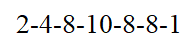

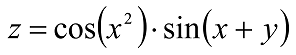

## Підготовчий етап

### Імпортування модулів

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Основний етап

### Клас створення нейромережі

In [2]:
class NeuralNetwork:
    def __init__(self):
        self.weights = [ np.random.rand(2, 4), np.random.rand(4, 8), np.random.rand(8, 10), np.random.rand(10, 8), np.random.rand(8, 8), np.random.rand(8, 1)]

    def forward(self, inputs):
        layers = [inputs]

        for i in range(len(self.weights)):
            layers.append(1 / (1 + np.exp(-np.dot(layers[i], self.weights[i]))))

        return layers[-1]

    def calculate_error(self, target):
        return np.mean(np.square(self.output - target))

### Клас Генетичного алгоритму

In [3]:
class GeneticAlgorithm:
    def __init__(self, population_size, mutation_rate):
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.population = [NeuralNetwork() for _ in range(population_size)]

    def fitness(self, x, y, z):
        fitness = []

        for network in self.population:
            output = network.forward(np.array([x, y]))
            error = np.mean(np.square(output - z))
            fitness.append(1 / (error + 1e-6))

        return fitness

    def crossover(self, parent1, parent2):
        child = NeuralNetwork()

        for i in range(len(child.weights)):
            crossover_point = random.randint(0, len(parent1.weights[i]))
            child.weights[i][:crossover_point] = parent1.weights[i][:crossover_point]
            child.weights[i][crossover_point:] = parent2.weights[i][crossover_point:]

        return child

    def mutate(self, network):
        for i in range(len(network.weights)):
            mutation_mask = np.random.rand(*network.weights[i].shape) < self.mutation_rate
            network.weights[i] += np.random.randn(*network.weights[i].shape) * mutation_mask * 0.1

        return network

    def generation(self, x, y, z):
        new_population = []
        fitness = self.fitness(x, y, z)

        for _ in range(self.population_size):
            parent1, parent2 = random.choices(self.population, weights = fitness, k = 2)
            child = self.crossover(parent1, parent2)
            child = self.mutate(child)
            new_population.append(child)

        self.population = new_population
        return min(fitness)

### Навчання моделі

In [4]:
population_size = 10
mutation_rate = 0.1
generations = 100

x_train = np.linspace(-1, 1, 50)
y_train = np.linspace(-1, 1, 50)
z_train = np.array([(np.cos(x**2) + np.sin(x + y)) for x, y in zip(x_train, y_train)])

x_test = np.linspace(-1, 1, 50)
y_test = np.linspace(-1, 1, 50)
z_test = np.array([[(np.cos(x**2) + np.sin(x + y)) for x in x_test] for y in y_test])

z_predicted = np.zeros((50, 50))

genetic_algorithm = GeneticAlgorithm(population_size, mutation_rate)

for generation in range(generations):
    for x, y, z in zip(x_train, y_train, z_train):
        genetic_algorithm.generation(x, y, z)

errors = []
best_network = genetic_algorithm.population[0]

for x in x_train:
    for y, z in zip(y_train, z_train):
        prediction = best_network.forward(np.array([x, y]))
        error = np.mean(np.square(prediction - np.array([z])))
        errors.append(error)

print("Результати роботи алгоритму:")

for i, (x, y) in enumerate(zip(x_train, y_train)):
    print(f"Проміжок вхідних даних: ({round(x, 1)}, {round(y, 1)}), Значення помилки: {errors[i] / 10}")

for i, x in enumerate(x_test):
    for j, y in enumerate(y_test):
        prediction = best_network.forward(np.array([x, y]))
        z_predicted[i,j] = prediction[0]

Результати роботи алгоритму:
Проміжок вхідних даних: (-1.0, -1.0), Значення помилки: 0.082755866786747
Проміжок вхідних даних: (-1.0, -1.0), Значення помилки: 0.07664084761882958
Проміжок вхідних даних: (-0.9, -0.9), Значення помилки: 0.07077987270427476
Проміжок вхідних даних: (-0.9, -0.9), Значення помилки: 0.06512236745617409
Проміжок вхідних даних: (-0.8, -0.8), Значення помилки: 0.05961990867794368
Проміжок вхідних даних: (-0.8, -0.8), Значення помилки: 0.054230385593067795
Проміжок вхідних даних: (-0.8, -0.8), Значення помилки: 0.04892151347018833
Проміжок вхідних даних: (-0.7, -0.7), Значення помилки: 0.04367374029591433
Проміжок вхідних даних: (-0.7, -0.7), Значення помилки: 0.03848255183762017
Проміжок вхідних даних: (-0.6, -0.6), Значення помилки: 0.03336014857442779
Проміжок вхідних даних: (-0.6, -0.6), Значення помилки: 0.028336443250430547
Проміжок вхідних даних: (-0.6, -0.6), Значення помилки: 0.0234593111844374
Проміжок вхідних даних: (-0.5, -0.5), Значення помилки: 0.01

### Побудова візуалізацій

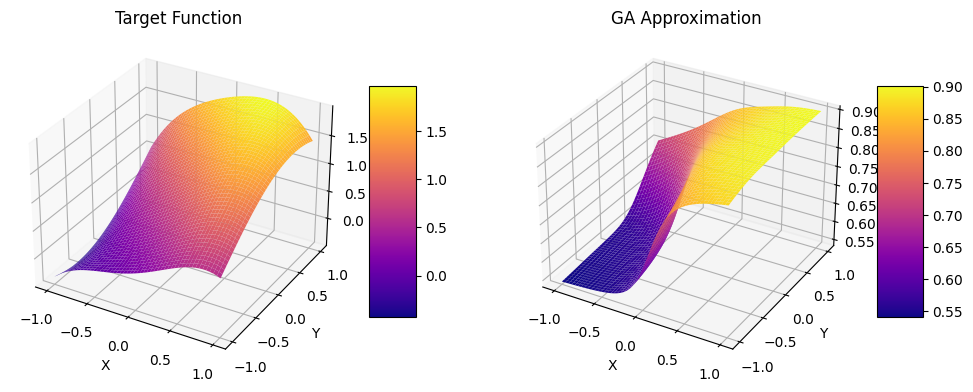

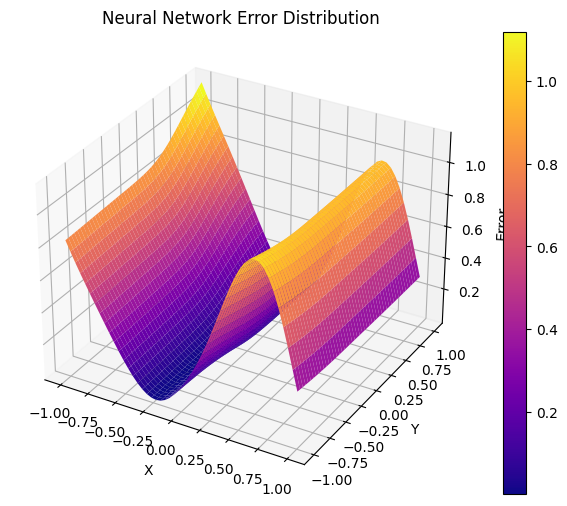

In [5]:
x_values, y_values = np.meshgrid(x_test, y_test)

fig = plt.figure(figsize = (12, 6))

ax1 = fig.add_subplot(121, projection = '3d')
surf1 = ax1.plot_surface(x_values, y_values, z_test, cmap = "plasma", edgecolor = "none")
fig.colorbar(surf1, ax = ax1, shrink = 0.5, aspect = 5)

ax2 = fig.add_subplot(122, projection = '3d')
surf2 = ax2.plot_surface(x_values, y_values, z_predicted, cmap = "plasma", edgecolor = "none")
fig.colorbar(surf2, ax = ax2, shrink = 0.5, aspect = 5)

ax1.set_title("Target Function")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax2.set_title("GA Approximation")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.show()

fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection = '3d')
plt.colorbar(ax.plot_surface(x_values, y_values, np.reshape(errors, (50, 50)), cmap = "plasma"))

ax.set_title("Neural Network Error Distribution")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel("Error")

plt.show()